Ingrese la base deseada (máximo 5000): 1000
Ingrese la ruta de la imagen para codificar: /content/Captura de pantalla 2025-03-19 013150.png


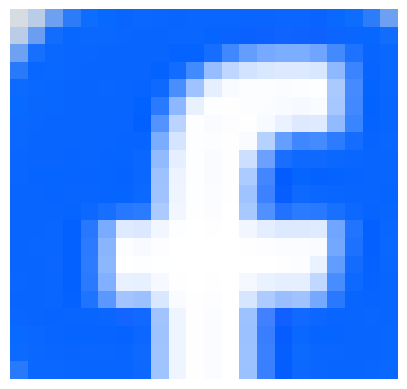

Número base 10 de la imagen: 44014815560215950546876025193195665955335080166385766982588908291869106108244090044045571551951774817247680870418919587317308821332857241876765859404772437761724685209826800144733117287415206665835917989071916489344883087421893128256517276462471104947689663535129086048560686989243726050180023100644113383198935777457245581249112665618554641372455983596260388558890091933093175860262343804270859571617446121718863144424890207380292348930170684032911582113606563360324466327558133306253666472405887655859837657505398627835648760167895771549723343133998561317032812576963788546799867272353580851674042041679029258945861789848712697583423040881369879934359039903577934561887911883937534853224930748183351424940936620701382980812281578734928341754159628662774077971377924494688243739301345992889471854324063126413258220758902063625290829565775325207989848160958945532984799104653044846993204739207387423174789694197673487098402000067818312422728535303839693302108113992149569

In [4]:
import sys
from collections import deque
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mostrar_imagen(ruta):
    """
    Muestra la imagen usando matplotlib en lugar de cv2.imshow().
    """
    imagen = cv2.imread(ruta)  # Leer la imagen
    if imagen is None:
        print("Error: No se pudo abrir la imagen.")
        return False

    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para matplotlib

    plt.imshow(imagen)  # Mostrar la imagen
    plt.axis("off")  # Ocultar ejes
    plt.show()

    return True

def generar_tabla_unicode(base):
    """
    Genera una tabla de caracteres Unicode imprimibles hasta la base especificada.
    """
    if base > 5000:
        raise ValueError("La base máxima permitida es 5000.")

    caracteres = []
    for i in range(10):
        caracteres.append(chr(48 + i))  # '0' - '9'

    for i in range(26):
        caracteres.append(chr(65 + i))  # 'A' - 'Z'

    for i in range(26):
        caracteres.append(chr(97 + i))  # 'a' - 'z'

    for i in range(base - len(caracteres)):
        caracteres.append(chr(161 + i))  # Caracteres Unicode imprimibles

    return caracteres[:base]

def convertir_a_base(numero, base):
    """
    Convierte un número en base 10 a una base personalizada utilizando caracteres Unicode.
    """
    if numero == 0:
        return "0"

    tabla_unicode = generar_tabla_unicode(base)
    resultado = deque()

    while numero:
        numero, residuo = divmod(numero, base)
        resultado.appendleft(tabla_unicode[residuo])

    return "".join(resultado)

def convertir_desde_base(num_str, base):
    """
    Convierte un número de una base personalizada a base 10.
    """
    tabla_unicode = generar_tabla_unicode(base)
    valor_decimal = 0
    longitud = len(num_str)

    for i, char in enumerate(num_str):
        if char not in tabla_unicode:
            raise ValueError(f"Carácter '{char}' no válido en la base {base}.")

        valor = tabla_unicode.index(char)
        valor_decimal += valor * (base ** (longitud - i - 1))

    return valor_decimal

def codificar_imagen(ruta, base):
    """
    Lee una imagen binaria, la convierte en un número y luego lo codifica en la base deseada.
    """
    numero = 0

    with open(ruta, "rb") as imagen:
        while (chunk := imagen.read(1024)):  # Leer en bloques de 1024 bytes
            for byte in chunk:
                numero = (numero * 256) + byte  # Convertir la imagen en un número

    print(f"Número base 10 de la imagen: {numero}")

    # Asegurar que Python pueda manejar números grandes
    sys.set_int_max_str_digits(len(str(numero)) + 1000)

    codificado = convertir_a_base(numero, base)
    return codificado

def decodificar_imagen(cadena_codificada, base, ruta_salida):
    """
    Convierte una cadena codificada en base personalizada de nuevo a un archivo de imagen.
    """
    # Convertir de base personalizada a decimal
    numero = convertir_desde_base(cadena_codificada, base)

    # Convertir el número decimal a bytes
    datos_bytes = []
    while numero:
        datos_bytes.append(numero % 256)
        numero //= 256

    datos_bytes.reverse()  # Invertir para mantener el orden original

    # Guardar en un archivo de imagen
    with open(ruta_salida, "wb") as imagen_salida:
        imagen_salida.write(bytearray(datos_bytes))

    print(f"Imagen reconstruida y guardada en: {ruta_salida}")

# Ejemplo de uso
if __name__ == "__main__":
    base = int(input("Ingrese la base deseada (máximo 5000): "))

    if base < 2 or base > 5000:
        print("Base fuera de rango.")
    else:
        ruta_imagen = input("Ingrese la ruta de la imagen para codificar: ")

        # Mostrar la imagen antes de codificar
        if mostrar_imagen(ruta_imagen):
            imagen_codificada = codificar_imagen(ruta_imagen, base)
            print(f"Imagen codificada en base {base}: {imagen_codificada[:100]}...")

            # Decodificar la imagen
            ruta_salida = "imagen_reconstruida.png"
            decodificar_imagen(imagen_codificada, base, ruta_salida)

